# Exploring a sports bettor's expectation of profitability from the perspective of price advantage.

<img src='pl_path_117_20210929.png'>

While there are various ways for a bettor to gain a pricing edge, such as line shopping or beating the closing line, this study simply looks into what a bettor's expectation of profitably looks like across a range of theoretical edges.



## First, let's look at how a bookmaker "juices" a line.

Juice is the term used for the bookmaker's commission, often used interchangeably with vigorish, vig, and overround.

In the familiar coin toss example, if we took a perfectly balanced coin and tossed it an infinite number of times then we would expect to see Heads 50% of the time, and Tails 50% of the time. The fair odds for a bet on Heads would be 1 / 0.50 = 2.0 in decimal odds or 0.5 / (1 - 0.5) * -100 = -100 in American odds. So a \\$100 bet on Heads that wins would pay out \\$200, since the bettor wins \\$100, and also gets back the original \\$100 used to place the wager. But in this case, the long term expectation for the gambler is \\$0, since 50% of the time they win \\$100 and 50% of the time they lose \\$100. $100 * 0.5 - \\$100 * 0.5 = \\$0.

Now consider a real world example, the Super Bowl Coin Toss. How can a Sports Book take bets on the outcome of this event from potentially millions of players while having a reasonable expectation of long term profitability? They juice the line to create a theoretical hold. Even though the true probability of heads or tails is 50% with fair odds of -100, you will typically see this proposition bet priced at -105 or -110. The juiced price of -110 implies that the probability of the event occuring is -110 / ( -110 - 100) = 52.38%. This creates a negative expected value for the player since the break-even rate of their bet at 52.38% is now higher than the 50% rate at which the event will actually occur. So if a player bets \\$110 to win \\$100 on Heads for example, then 50% of the time they will win \\$100 but 50% of the time they will lose \\$110, for an expected value of \\$100 * 0.5 - \\$110 * 0.5 = -\\$5.

If both sides of this coin toss are priced -110, then the bookmaker's odds key is 52.38%+52.38%=104.8% (the juice is the amount in excess of 100%, in this case 4.8%), and their theoretical hold (the expected profit margin) is 4.8%/104.8%=4.6%. So if a bookie took two bets on this coin toss, one from a player betting \\$110 to win \\$100 on Heads, and the other from a player betting \\$110 to win \\$100 on tails, they will have booked \\$220 on the event. Whichever side the coin lands on, they will then pay out to the winner \\$210 (\\$100 in winnings plus the original \\$110 bet) and keep the leftover \\$10 as profit. In this contrived example, the practical hold of 10 / 220 = 4.6% matches the theoretical hold due to the bookmaker getting perfectly balanced action. 

Here's a data frame generated in Python showing what this all works out to for different odds keys.

In [1]:
df1

,true probability heads,true probability tails,odds key,implied prob. heads,implied prob. tails,juice,decimal odds,American odds,theoretical hold
0,0.5,0.5,1.00,0.500,0.500,0.00,2.00,-100,0.0000
1,0.5,0.5,1.03,0.515,0.515,0.03,1.94,-106,0.0291
2,0.5,0.5,1.05,0.525,0.525,0.05,1.90,-110,0.0476
3,0.5,0.5,1.08,0.540,0.540,0.08,1.85,-117,0.0741


## Closing Line Value

A Sports Book's betting products can be separated into three main groups: pre-match markets, in-play (live) markets, and the season-long outright (futures) markets. While the idea of closing line value works in all of these markets, let's consider it in reference to pre-match markets.

For a sport like American Football sports books start offering a pre-match market about a week before the event, when they hang the "opening line." Think of the opening line as an educated guess as to the likelihood of each possible outcome of a sporting event. Over the course of that week, new information becomes available, players get injured, players who were injured are cleared to play, large bets responding to this information come in, etc. As this new information becomes available, it is necessary to update the odds on the event. Since the pre-match market is available up until a few minutes before the game starts, the final price offered on the event, the "closing line," reflects all the information publicly available on the game up to that point. It is thus considered the most accurate estimate of the underlying probabilities for each possible outcome of the event, and bettors who regularly "beat" the closing line are considered to have a reasonable expectation of long term profitability.

For example, imagine two teams are going to play each other and Team A is priced at -120, and Team B is priced at -100. If a player wagers on side B for -100, the break-even rate for that bet is 50%. Now imagine that in the last hour before the game starts, the price moves to team A -100, team B -120 in response to news that a star player is sitting the game out. Odds of -120 imply a probability of -120 / (-120 - 100) = 54.55%. Since we already know that the new price on Team A of -100 implies a probability of 50%, the true probability of team B winning this matchup is 54.55% / (50% + 54.55%) = 52.15% which is higher than the break-even rate of our imaginary sports bettor's wager. Assuming they wagered \\$100 on team B, they now have a positive expected value on this bet of 100 * 0.5215 - 100 * (1 - 0.5215) = \\$4.30.

As stated before there are various ways to try to get a price advantage, including beating price momentum in reaction to an injury report, developing a statistical model that is more accurate than a book's lines, and so on. But whatever angle a bettor uses to get value, just how much value is needed for them to have a reasonable expectation of long term profitability, after making hundreds of bets or more?

## A Monte Carlo Betting Simulation

In this section, we'll explore the expectation of profitability based on price edge with a Monte Carlo simulation. Specifically, I look at what happends if 1,000 unskilled bettors each made 1,000 bets at increasing levels of pricing edges over the bookmaker's line. By unskilled, I mean the bettor has no ability to "pick winners" any better than a random process, such as tossing a coin for binary markets, or for more than two outcomes rolling an n-sided die for markets with n possible outcomes. Each bettor starts with a bankroll of 100 units, and the staking method is set so that they will always be betting whatever amount is required to win exactly 1 unit.

The bookmaker's line was randomly generated as a series of Home and Away team win probabilities drawn from a logistic distribution. These win probabilities were then scaled so that no team has a better than 90%, or worse than 10%, chance of winning. Finally the probabilities were juiced with a 1.05 odds key (refer to the table shown earlier for a reminder of how this affects the implied probabilities.)

We'll consider "price edge" to be the percentage of juice removed. So for a 1.05 odds key, a price edge of 50% would be equivalent to betting into a price based on a 1.025 odds key (allowing for some rounding error.) A price edge of 100% would be equivalent to betting at a price equal to the true odds of the event occuring (a "vig free" price.) Any bet at a price edge greater than 100% and the bettor will have a positive expected value for that wager. 

### Simulation Results

<img src='price_edge_graph_20210929.png'>

As we would intuitively expect, when bettors had a 100% price edge approximately 50% were profitable. These bettors were getting the "vig-free" price, for which the break-even rate of their bet is the same as the true odds of the event occuring. This is highlighted with the purple line in the chart above.

The expectation of profitability exceeds 90% with a price edge of 185%, highlighted with the green line. For an event with true odds of 50% this comes out to being able to bet the selection at 28.4%. From an odds perspective, this is equivalent to allowing a bettor who should be paying -110 (in a market where the price is juiced with a 1.05 odds key) to bet at 3.52 decimal, +252 American odds. In the real world, to get even close to a mis-pricing that bad would likely require human error such as when a trader accidentally flips the odds for an underdog and favorite when posting the lines on a new game.

Assuming a bettor found a market where mis-pricings of about 8% were common, this comes out to a price edge of 117.5% with a 60.9% expectation of profitability over 1,000 bets, highlighted with the orange line. This is equivalent to being able to bet into an event with true odds of 50% (that should be priced 52.5% or -110 with a 1.05 odds key) at a price of 44.7%, or 2.24 decimal, +124 Amercian odds.

Interestingly, an average of just over 5% of unskilled bettors betting into the bookmaker's fully juiced price (at a 1.05 oddskey) were profitable by chance. We will look at this a bit closer in the next section and see how this expectation effectively drops to 0% over a large enough sample size:

In [44]:
simulations[simulations['price edge']==0.0]

,price edge,group1,group2,group3,group4,group5,group6,group7,group8,group9,group10,group avg
20,0.0,0.047,0.045,0.054,0.052,0.05,0.063,0.054,0.05,0.044,0.056,0.0515


### Visualizing Bankroll Development Over the Course of 5,000 Bets

The reader might well be surprised to learn previously that just about 1 in 20 bettors making wagers into a fully juiced line using a system no better at picking winners than a coin toss were still profitable. I would attribute this to two things: although unskilled, these simulated bettors were very disciplined; and we only looked at the results of 1,000 bets. It may sound like a lot, indeed for a gambler who only bets regular season NFL games that's almost 4 years of wagers. But it's not even a half season's worth of MLB games, and we're still ignoring the opportunities to wager on all the other major sporting events that occur across the globe in a year.

So let's run a simulation with those particular settings again (1,000 gamblers with 0% edge betting into a 1.05 odds key), but increase the wager count to 5,000:

In [124]:
np.random.seed(5000)
a, b, c, d = simulate_profits(price_edge=0.0,oddskey=1.05,n_bets=5000,n_bettors=1000,sim_type='advanced')
df000 = pd.DataFrame(b)
print(f'In this simulation run, {len(a[a>0])/len(a)*100}% of bettors were profitable.')

In this simulation run, 0.0% of bettors were profitable.


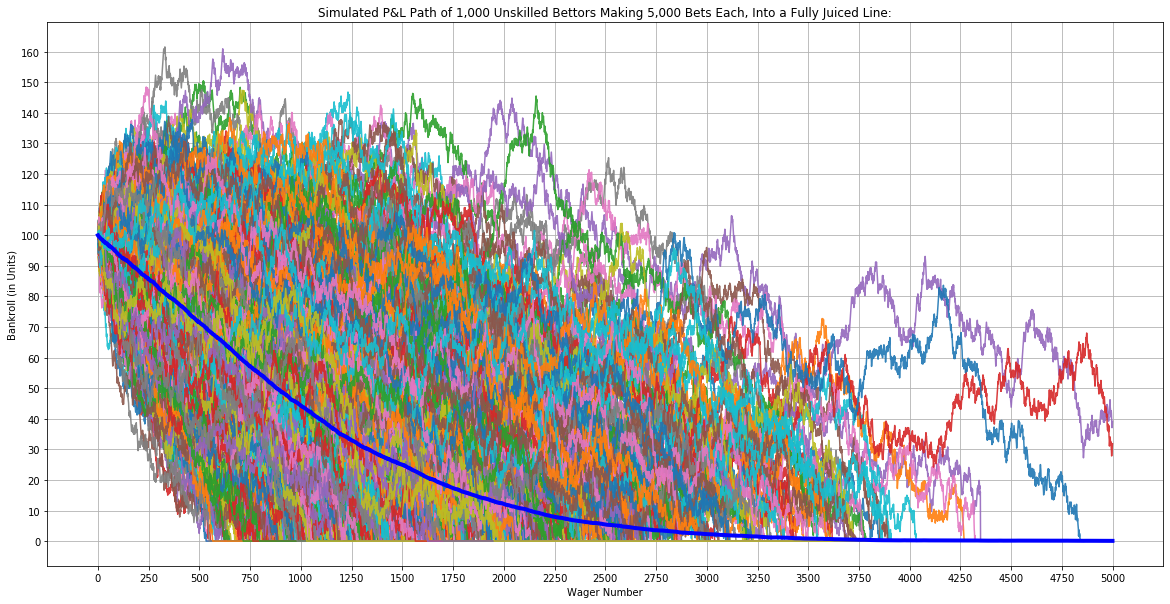

In [125]:
df000.plot(figsize=(20,10),legend=False,alpha=0.9)
df000.mean(axis=1).plot(color='blue',lw=4,grid=True)
plt.gcf()
plt.yticks(np.arange(0,170,10));
plt.xticks(np.arange(0,5250,250))
plt.xlabel('Wager Number')
plt.ylabel('Bankroll (in Units)')
plt.title('Simulated P&L Path of 1,000 Unskilled Bettors Making 5,000 Bets Each, Into a Fully Juiced Line:');

The plot above shows the P&L path (in units) for each of the 1,000 gamblers, starting with a 100 unit bankroll, over the course of 5,000 wagers. The thick blue line shows the average bankroll size after each bet.

We see that the first of our very disciplined bettors lasts for just over 500 bets before their bankroll goes to 0 units for a total loss. By 1,000 bets the average bankroll size is less than half of what everyone started with, at 44 units. The number of gamblers who have more than 100 units starts to visually thin out from about 1,500 bets, and the bankroll of the last straggler falls below 100 units by around 3,100 bets, at which point the number of profitable bettors finally becomes 0.0%. By the final wager of this simulation run only two of the original 1,000 gamblers have any bankroll left at all.

What if we keep all the parameters from above, except this time we let the gamblers bet into the vig-free line, for a 100% price edge:

In [126]:
np.random.seed(5000)
a, b, c, d = simulate_profits(price_edge=1.0,oddskey=1.05,n_bets=5000,n_bettors=1000,sim_type='advanced')
df100 = pd.DataFrame(b)
print(f'In this simulation run, {len(a[a>0])/len(a)*100}% of bettors were profitable.')

In this simulation run, 49.8% of bettors were profitable.


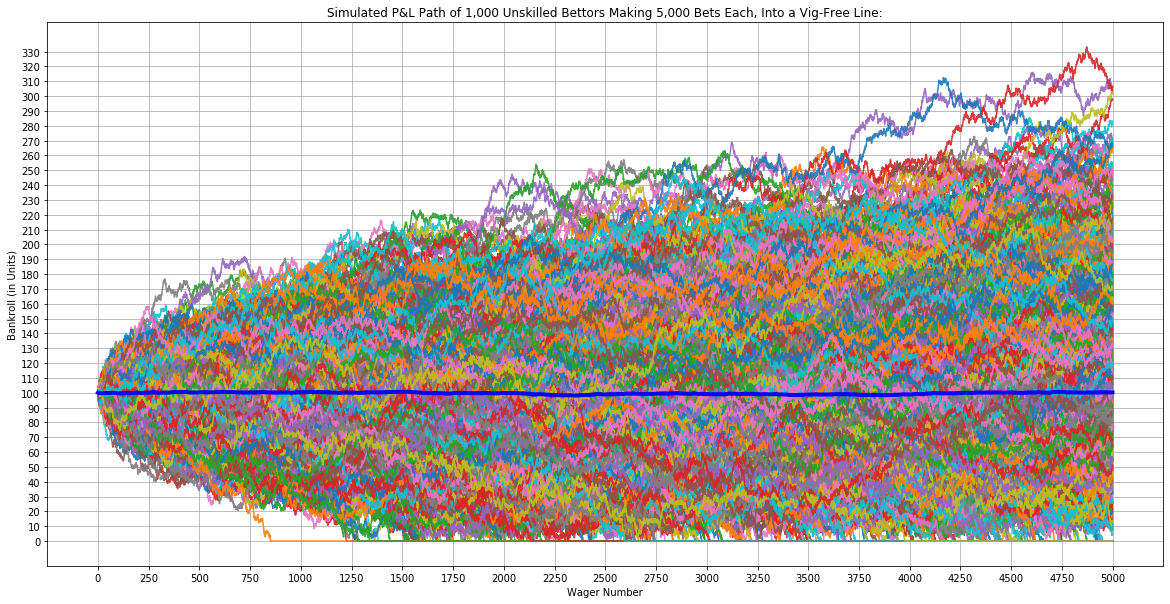

In [130]:
df100.plot(figsize=(20,10),legend=False,alpha=0.9)
df100.mean(axis=1).plot(color='blue',lw=4,grid=True)
plt.gcf()
plt.yticks(np.arange(0,340,10));
plt.xticks(np.arange(0,5250,250))
plt.xlabel('Wager Number')
plt.ylabel('Bankroll (in Units)')
plt.title('Simulated P&L Path of 1,000 Unskilled Bettors Making 5,000 Bets Each, Into a Vig-Free Line:');

This time, the first gambler suffers a total loss by around their 800th bet, but the average bankroll size stays nearly constant at 100 units throughout. So while it may look enticing to see some of the gamblers grow their bankroll to over 300 units by the end of the simulation, this is the result of a random walk and the expectation of the individual is to stay flat.

Finally, let's change the price edge to 117.5%, which was the situation in the original simulation run where mis-pricings of about 8% were common, and 60.9% of gamblers were profitable over 1,000 bets.

In [132]:
np.random.seed(5000)
a, b, c, d = simulate_profits(price_edge=1.175,oddskey=1.05,n_bets=5000,n_bettors=1000,sim_type='advanced')
df117 = pd.DataFrame(b)
print(f'In this simulation run, {len(a[a>0])/len(a)*100}% of bettors were profitable.')

In this simulation run, 72.1% of bettors were profitable.


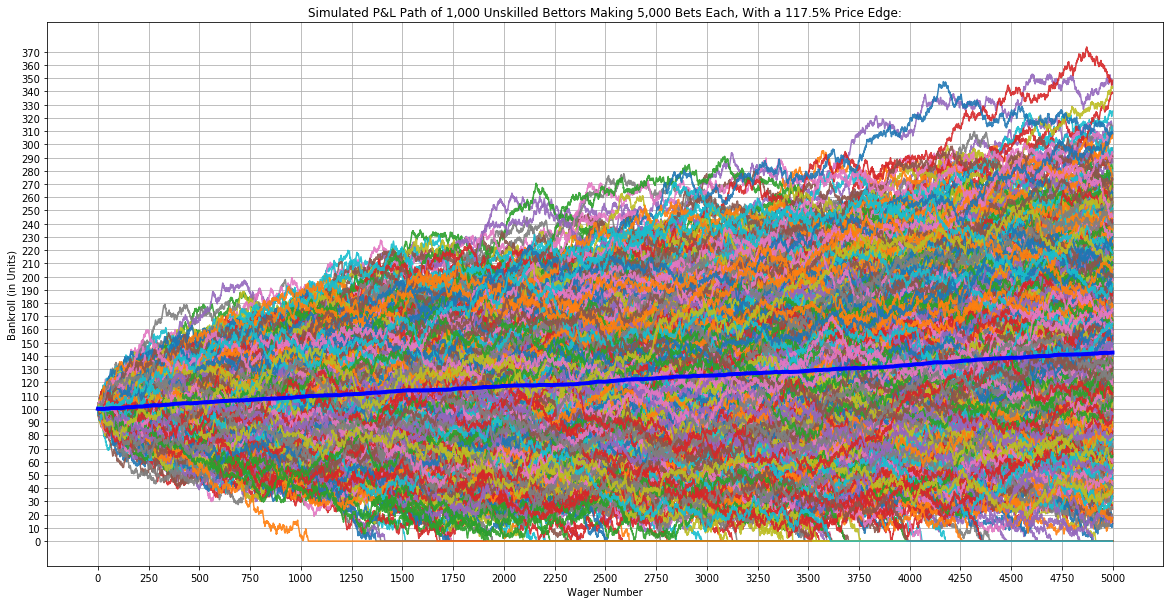

In [149]:
df117.plot(figsize=(20,10),legend=False,alpha=0.9)
df117.mean(axis=1).plot(color='blue',lw=4,grid=True)
plt.gcf()
plt.yticks(np.arange(0,380,10));
plt.xticks(np.arange(0,5250,250))
plt.xlabel('Wager Number')
plt.ylabel('Bankroll (in Units)')
plt.title('Simulated P&L Path of 1,000 Unskilled Bettors Making 5,000 Bets Each, With a 117.5% Price Edge:');
# plt.savefig('pl_path_117_20210929.png');

We still see some gamblers experience a total loss, with the first bankroll dropping to 0 units just after 1,000 bets. However, there is a steady increase in the average bankroll size, such that by the end of the simulation the average bankroll has increased by 42.5% to 142.5 units.

## Source Code

In [ ]:
import numpy as np
import pandas as pd

a = np.empty(shape=(4,2))
a[:,0] = 0.5
a[:,1] = 0.5
df1 = pd.DataFrame(a,columns=('true probability heads','true probability tails'))

df1['odds key'] = [1.0,1.03,1.05,1.08]
df1['implied prob. heads'] = df1['true probability heads'] * df1['odds key']
df1['implied prob. tails'] = df1['true probability tails'] * df1['odds key']
df1['juice'] = (df1['implied prob. heads']+df1['implied prob. tails'])-1.0
df1['decimal odds'] = round(1/df1['implied prob. heads'],2)
df1['American odds'] = df1['implied prob. heads'] / (1-df1['implied prob. heads'])*-100
df1['American odds'] = df1['American odds'].astype(int)
df1['theoretical hold'] = round((df1['odds key']-1)/df1['odds key'],4)

In [ ]:
# define the simulator
def simulate_profits(price_edge=0.50,oddskey=1.05,n_bets=1000,n_bettors=1000,sim_type='basic'):
    # the 'basic' version just tracks what percentage of bettors were profitable for that simulation run
    # 'basic' has 1 output.
    # the 'advanced' version also tracks their bankrolls, amount staked per bet, and the outcome of each bet,
    # which can be used for vizualizing the experiments. 'advanced' has 4 outputs
    if sim_type not in ['basic','advanced']:
        print('received an invalid input for simulation type')
        return
    juice = oddskey - 1.0
    bettors_pl = np.empty(0)
    if sim_type == 'advanced':
        bettors_bankrolls = np.empty(0)
        bettors_wagers = np.empty(0)
        bettors_results = np.empty(0)
    for i in range(n_bettors):  
        # pull home team win probs from a logistic distribution centered on 0.52 to reflect an imagined home field advantage
        logistic_rands = np.random.logistic(loc=0.52, scale=1.0, size=n_bets)
        min_val = logistic_rands.min()
        scaled_rands = logistic_rands - min_val
        max_val = scaled_rands.max()
        normalized_rands = scaled_rands/max_val
        normalized_rands = normalized_rands * 0.80
        rands = normalized_rands + 0.10 # this and the above line ensure there is no p<0.10 or >0.90

        h_win_probs = rands
        a_win_probs = 1-h_win_probs # away win probs = complement of home probs
        h_juiced = h_win_probs * oddskey # juice the probabilities
        a_juiced = a_win_probs * oddskey
        
        bettors_h_probs = h_juiced / (1 + juice * price_edge) # calculate the bettor's break-even prob. based on price edge
        bettors_a_probs = a_juiced / (1 + juice * price_edge) # same as above but for away
        bettors_h_prices = 1 / bettors_h_probs # calculate the price as decimal odds
        bettors_a_prices = 1 / bettors_a_probs # same as above but for away
        bet_outcomes = [np.random.binomial(1, p) for p in h_win_probs] # use the true win prob. to generate win/loss results
        bettors_choice = np.random.binomial(1, 0.50, n_bets) # flip a coin to choose a team, 1=home, 0=away

        # calculate wagering results, staking method = risk to win 1 unit
        bankroll = np.empty(0)
        wagers = np.empty(0)
        results = np.empty(0)
        for j in range(n_bets):
            if bettors_choice[j] == 1:
                if bet_outcomes[j] == 0:
                    risked = 1 / (bettors_h_prices[j]-1) # always risk to win 1 unit
                    wagers = np.append(wagers,risked)
                    lost = risked * -1
                    if sim_type == 'basic':
                        results = np.append(results, lost)
                    if sim_type == 'advanced':
                        if j == 0:
                            bankroll = np.append(bankroll, 100+lost)
                            results = np.append(results, lost)
                        elif bankroll[-1] <= 0:
                            wagers[-1] = 0
                            bankroll = np.append(bankroll, 0)
                            results = np.append(results, 0)
                        elif (bankroll[-1]+lost) <= 0:
                            wagers[-1] = 0
                            bankroll = np.append(bankroll, 0)
                            results = np.append(results, 0)
                        else:
                            bankroll = np.append(bankroll, bankroll[-1]+lost)
                            results = np.append(results, lost)

                else:
                    risked = 1 / (bettors_h_prices[j]-1) # always risk to win 1 unit
                    wagers = np.append(wagers,risked)
                    won = 1
                    if sim_type == 'basic':
                        results = np.append(results, won)
                    if sim_type == 'advanced':
                        if j == 0:
                            bankroll = np.append(bankroll, 100+won)
                            results = np.append(results, won)
                        elif bankroll[-1] <= 0:
                            wagers[-1] = 0
                            bankroll = np.append(bankroll, 0)
                            results = np.append(results, 0)
                        else:
                            bankroll = np.append(bankroll, bankroll[-1]+won)
                            results = np.append(results, won)
            else:
                if bet_outcomes[j] == 1:
                    risked = 1 / (bettors_a_prices[j]-1) # always risk to win 1 unit
                    wagers = np.append(wagers,risked)
                    lost = risked * -1
                    if sim_type == 'basic':
                        results = np.append(results, lost)
                    if sim_type == 'advanced':
                        if j == 0:
                            bankroll = np.append(bankroll, 100+lost)
                            results = np.append(results, lost)
                        elif bankroll[-1] <= 0:
                            wagers[-1] = 0
                            bankroll = np.append(bankroll, 0)
                            results = np.append(results, 0)
                        elif (bankroll[-1]+lost) <= 0:
                            wagers[-1] = 0
                            bankroll = np.append(bankroll, 0)
                            results = np.append(results, 0)
                        else:
                            bankroll = np.append(bankroll, bankroll[-1]+lost)
                            results = np.append(results, lost)
                else:
                    risked = 1 / (bettors_h_prices[j]-1) # always risk to win 1 unit
                    wagers = np.append(wagers,risked)
                    won = 1
                    if sim_type == 'basic':
                        results = np.append(results, won)
                    if sim_type == 'advanced':
                        if j == 0:
                            bankroll = np.append(bankroll, 100+won)
                            results = np.append(results, won)
                        elif bankroll[-1] <= 0:
                            wagers[-1] = 0
                            bankroll = np.append(bankroll, 0)
                            results = np.append(results, 0)
                        else:
                            bankroll = np.append(bankroll, bankroll[-1]+won)
                            results = np.append(results, won)

        bettors_pl = np.append(bettors_pl, results.sum())
        if sim_type == 'advanced':
            bankroll[bankroll<0] = 0
            bettors_bankrolls = np.append(bettors_bankrolls, bankroll)
            bettors_wagers = np.append(bettors_wagers, wagers)
            bettors_results = np.append(bettors_results, results)    

    if sim_type=='basic':
        return len(bettors_pl[bettors_pl>0])/len(bettors_pl)
    else:
        return (bettors_pl,
                bettors_bankrolls.reshape(n_bettors,n_bets).T,
                bettors_wagers.reshape(n_bettors,n_bets).T,
                bettors_results.reshape(n_bettors,n_bets).T)

In [ ]:
# utility function to write output of a 'simple' simulation to csv
def simple_run_to_csv(sim_results, csvname='simple_run_results',outmode='w'):
    import csv

    with open(f'{csvname}.csv',mode=outmode,newline='') as csvfile:
        writer = csv.writer(csvfile)
        for v in sim_results:
            writer.writerow([v])

# used to append simulation output to the original runs if a longer sample is desired
def simple_run_append_csv(sim_results, csvname='simple_run_results'):
    import csv

    with open(f'{csvname}.csv','a',newline='') as csvfile:
        writer = csv.writer(csvfile)
        for v in sim_results:
            writer.writerow([v])

In [ ]:
# run the simulation using price edges from -25% up to +250% in steps of 1.25% (221 runs of the simulator), and time it.
# for each run, store the percentage of bettors that were profitable at that price edge in an array group
# generate ten simulated groups, in order to average the outputs to smooth the results
# 
from datetime import datetime as dt

start = dt.now()

for i in range(10):
    group = np.empty(0)
    for j in np.arange(-0.25,2.5125,0.0125):
        group = np.append(group, simulate_profits(price_edge=round(j,4)))

    simple_run_to_csv(group, csvname=f'prof_edge_sim_group{j+1}')    

print(dt.now()-start)

In [ ]:
simulations = pd.DataFrame(data=np.arange(-0.25,2.5125,0.0125).round(4),columns=['price edge'])
for i in range(1,11):
    simulations[f'group{i}'] = pd.read_csv(f'prof_edge_sim_group{i}.csv',names=[f'group{i}'])
simulations['group avg'] = simulations.iloc[:,1:11].mean(axis=1)

In [ ]:
from matplotlib import pyplot as plt

plt.figure(figsize=(19,6))
plt.yticks(np.arange(0,1.05,0.05))
#apply a short moving average to visually smooth the plotted curve
plt.plot(simulations['price edge'],simulations['group avg'].rolling(3).mean())
plt.xticks(np.arange(-0.2,2.55,0.1).round(2))
plt.axvline(1.0,ymax=0.495,c='purple')
plt.axhline(0.50,xmax=0.455,c='purple')
plt.axvline(1.175,ymax=0.59,c='orange')
plt.axhline(0.60,xmax=0.5125,c='orange')
plt.axvline(1.85,ymax=0.87,c='green')
plt.axhline(0.90,xmax=0.74,c='green')
plt.xlabel('Price Edge (as a % of the juice)')
plt.ylabel('Percentage of Profitable Bettors')
plt.title('A Simulation of 1,000 Bettors Making 1,000 Bets Each, Across a Range of Price Edges:')
plt.grid(True);
# plt.savefig('price_edge_graph_20210929.png')